In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import numpy as np
import json
import os

## Loading dataset & filter settings

In [2]:
datasets_dir = "./reconstructed_events"
final_df = pd.read_csv(os.path.join(datasets_dir, "higgs_events_SMHiggsToZZTo4L_0.csv"))

In [3]:
# Load filter settings
with open('filter_settings.json', 'r') as file:
    filter_settings = json.load(file)
filter_settings

{'mass_Z_1': {'min': 70, 'max': 110},
 'mass_Z_2': {'min': 0.4, 'max': 40},
 'isolation': {'min': 0, 'max': 0.44},
 'energy_1_1': {'min': 44, 'max': 140},
 'energy_1_2': {'min': 38.01, 'max': 100},
 'energy_2_1': {'min': 10, 'max': 200},
 'energy_2_2': {'min': 3.98, 'max': 99.98},
 'sip3d': {'min': 0, 'max': 10}}

## Plotting dataset

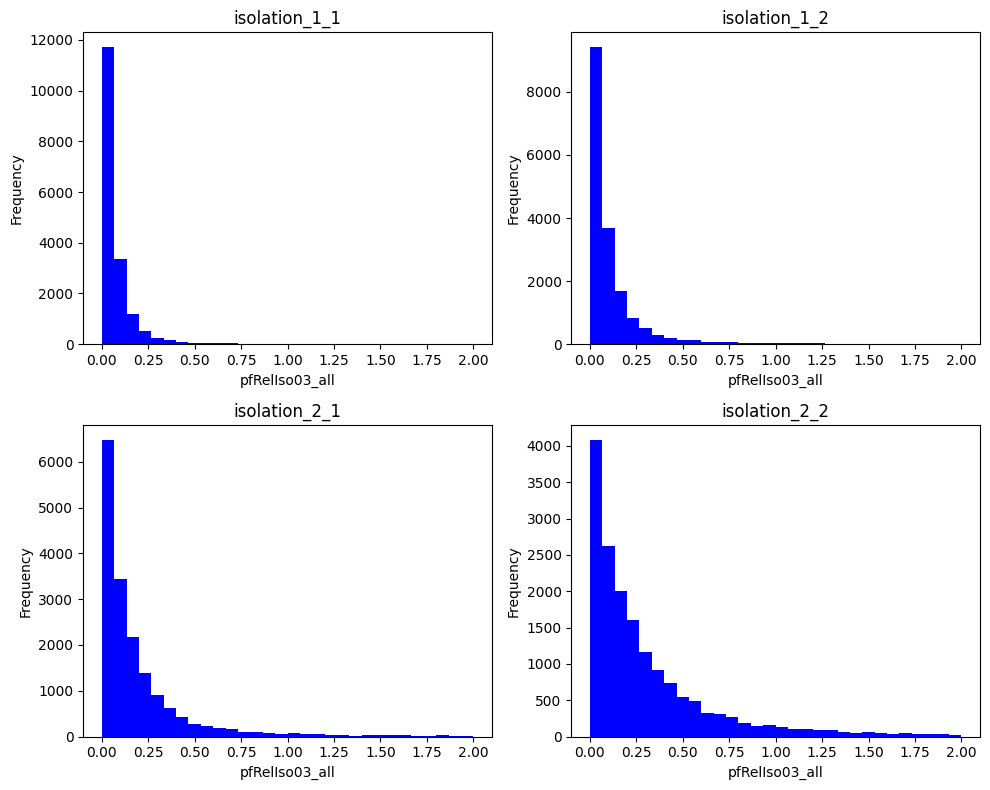

In [9]:
# Plotting histograms
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
iso_range = (0, 2)

axs[0, 0].hist(final_df['isolation_1_1'], range=iso_range, bins=30, color='blue')
axs[0, 0].set_title('isolation_1_1')
axs[0, 0].set_xlabel("pfRelIso03_all")
axs[0, 0].set_ylabel("Frequency")

axs[0, 1].hist(final_df['isolation_1_2'], range=iso_range, bins=30, color='blue')
axs[0, 1].set_title('isolation_1_2')
axs[0, 1].set_xlabel("pfRelIso03_all")
axs[0, 1].set_ylabel("Frequency")

axs[1, 0].hist(final_df['isolation_2_1'], range=iso_range, bins=30, color='blue')
axs[1, 0].set_title('isolation_2_1')
axs[1, 0].set_xlabel("pfRelIso03_all")
axs[1, 0].set_ylabel("Frequency")

axs[1, 1].hist(final_df['isolation_2_2'], range=iso_range, bins=30, color='blue')
axs[1, 1].set_title('isolation_2_2')
axs[1, 1].set_xlabel("pfRelIso03_all")
axs[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

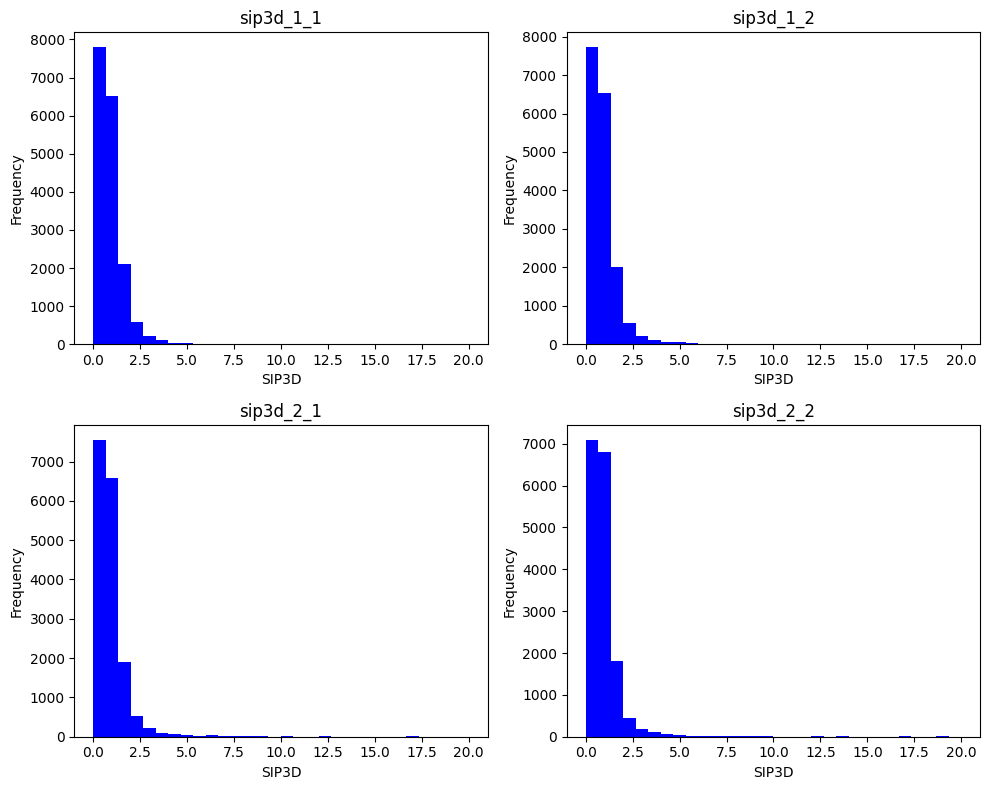

In [14]:
# Plotting histograms
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
sip3d_range = (0, 20)

axs[0, 0].hist(final_df['sip3d_1_1'], bins=30, range=sip3d_range, color='blue')
axs[0, 0].set_title('sip3d_1_1')
axs[0, 0].set_xlabel("SIP3D")
axs[0, 0].set_ylabel("Frequency")

axs[0, 1].hist(final_df['sip3d_1_2'], bins=30, range=sip3d_range, color='blue')
axs[0, 1].set_title('sip3d_1_2')
axs[0, 1].set_xlabel("SIP3D")
axs[0, 1].set_ylabel("Frequency")

axs[1, 0].hist(final_df['sip3d_2_1'], bins=30, range=sip3d_range, color='blue')
axs[1, 0].set_title('sip3d_2_1')
axs[1, 0].set_xlabel("SIP3D")
axs[1, 0].set_ylabel("Frequency")

axs[1, 1].hist(final_df['sip3d_2_2'], bins=30, range=sip3d_range, color='blue')
axs[1, 1].set_title('sip3d_2_2')
axs[1, 1].set_xlabel("SIP3D")
axs[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [16]:
# Function to create histograms and filter data
def plot_histograms(min_val_mass_Z_1, max_val_mass_Z_1, min_val_mass_Z_2, max_val_mass_Z_2,

                    min_val_isolation, max_val_isolation,

                    min_val_sip3d, max_val_sip3d,

                    min_val_energy_1_1, max_val_energy_1_1,
                    min_val_energy_1_2, max_val_energy_1_2,
                    min_val_energy_2_1, max_val_energy_2_1,
                    min_val_energy_2_2, max_val_energy_2_2,

                    bins_mass_Z_1, bins_mass_Z_2, bins_mass_H):

    filtered_data = final_df[
        (final_df['mass_Z_1'] >= min_val_mass_Z_1) & (final_df['mass_Z_1'] <= max_val_mass_Z_1) &
        (final_df['mass_Z_2'] >= min_val_mass_Z_2) & (final_df['mass_Z_2'] <= max_val_mass_Z_2) &

        (final_df['isolation_1_1'] >= min_val_isolation) & (final_df['isolation_1_1'] <= max_val_isolation) &
        (final_df['isolation_1_2'] >= min_val_isolation) & (final_df['isolation_1_2'] <= max_val_isolation) &
        (final_df['isolation_2_1'] >= min_val_isolation) & (final_df['isolation_2_1'] <= max_val_isolation) &
        (final_df['isolation_2_2'] >= min_val_isolation) & (final_df['isolation_2_2'] <= max_val_isolation) &

        (final_df['energy_1_1'] >= min_val_energy_1_1) & (final_df['energy_1_1'] <= max_val_energy_1_1) &
        (final_df['energy_1_2'] >= min_val_energy_1_2) & (final_df['energy_1_2'] <= max_val_energy_1_2) &
        (final_df['energy_2_1'] >= min_val_energy_2_1) & (final_df['energy_2_1'] <= max_val_energy_2_1) &
        (final_df['energy_2_2'] >= min_val_energy_2_2) & (final_df['energy_2_2'] <= max_val_energy_2_2) &

        (final_df['sip3d_1_1'] >= min_val_sip3d) & (final_df['sip3d_1_1'] <= max_val_sip3d) &
        (final_df['sip3d_1_2'] >= min_val_sip3d) & (final_df['sip3d_1_2'] <= max_val_sip3d) &
        (final_df['sip3d_2_1'] >= min_val_sip3d) & (final_df['sip3d_2_1'] <= max_val_sip3d) &
        (final_df['sip3d_2_2'] >= min_val_sip3d) & (final_df['sip3d_2_2'] <= max_val_sip3d)
    ]

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    m_2l_range_1 = (filtered_data['mass_Z_1'].min(), filtered_data['mass_Z_1'].max())
    axs[0].hist(filtered_data['mass_Z_1'], bins=bins_mass_Z_1, color='skyblue')
    axs[0].set_title('CERN Open Data CMS Run 2012 B, C', loc="left")
    axs[0].set_xlabel('$m_{Z_1}$ [GeV]')
    axs[0].set_ylabel('$N_{Events}$' + f' / {round((m_2l_range_1[1] - m_2l_range_1[0])/bins_mass_Z_1, 2)} GeV')

    m_2l_range_2 = (filtered_data['mass_Z_2'].min(), filtered_data['mass_Z_2'].max())
    axs[1].hist(filtered_data['mass_Z_2'], bins=bins_mass_Z_2, color='salmon')
    axs[1].set_title('CERN Open Data CMS Run 2012 B, C', loc="left")
    axs[1].set_xlabel('$m_{Z_2}$ [GeV]')
    axs[1].set_ylabel('$N_{Events}$' + f' / {round((m_2l_range_2[1] - m_2l_range_2[0])/bins_mass_Z_2, 2)} GeV')

    m_4l_range = (70, 180)
    axs[2].hist(filtered_data['mass_H'], bins=bins_mass_H, color='lightgreen', range=m_4l_range)
    axs[2].set_title('CERN Open Data CMS Run 2012 B, C', loc="left")
    axs[2].set_xlabel('$m_{4l}$ [GeV]')
    axs[2].set_ylabel('$N_{Events}$' + f' / {round((m_4l_range[1] - m_4l_range[0])/bins_mass_H, 2)} GeV')
    axs[2].axvline(125, color='yellow', linestyle='dashed', linewidth=2, label=f'Higgs-Boson', alpha=0.5)
    axs[2].legend(loc="upper right")

    plt.tight_layout()
    plt.show()

# Define sliders for min and max values
min_slider_mass_Z_1 = widgets.FloatSlider(value=filter_settings["mass_Z_1"]["min"], min=final_df['mass_Z_1'].min(),
                                          max=final_df['mass_Z_1'].max(), step=0.01, description='Min of mass_Z_1:', style=dict(description_width='initial'))
max_slider_mass_Z_1 = widgets.FloatSlider(value=filter_settings["mass_Z_1"]["max"], min=final_df['mass_Z_1'].min(),
                                          max=final_df['mass_Z_1'].max(), step=0.01, description='Max of mass_Z_1:', style=dict(description_width='initial'))

min_slider_mass_Z_2 = widgets.FloatSlider(value=filter_settings["mass_Z_2"]["min"], min=final_df['mass_Z_2'].min(),
                                          max=final_df['mass_Z_2'].max(), step=0.01, description='Min of mass_Z_2:', style=dict(description_width='initial'))
max_slider_mass_Z_2 = widgets.FloatSlider(value=filter_settings["mass_Z_2"]["max"], min=final_df['mass_Z_2'].min(),
                                          max=final_df['mass_Z_2'].max(), step=0.01, description='Max of mass_Z_2:', style=dict(description_width='initial'))

max_iso = max(final_df['isolation_1_1'].max(), final_df['isolation_1_2'].max(), final_df['isolation_2_1'].max(), final_df['isolation_2_2'].max()) 
min_slider_iso = widgets.FloatSlider(value=filter_settings["isolation"]["min"], min=0,
                                         max=max_iso, step=0.01, description='Min of isolation:', style=dict(description_width='initial'))
max_slider_iso = widgets.FloatSlider(value=filter_settings["isolation"]["max"], min=0,
                                         max=max_iso, step=0.01, description='Max of isolation:', style=dict(description_width='initial'))

max_sip3d = max(final_df['sip3d_1_1'].max(), final_df['sip3d_1_2'].max(), final_df['sip3d_2_1'].max(), final_df['sip3d_2_2'].max()) 
min_slider_sip3d = widgets.FloatSlider(value=filter_settings["sip3d"]["min"], min=0,
                                            max=max_sip3d, step=0.01, description='Min of sip3d:', style=dict(description_width='initial'))
max_slider_sip3d = widgets.FloatSlider(value=filter_settings["sip3d"]["max"], min=0,
                                            max=max_sip3d, step=0.01, description='Max of sip3d:', style=dict(description_width='initial'))

min_slider_energy_1_1 = widgets.FloatSlider(value=filter_settings["energy_1_1"]["min"], min=final_df['energy_1_1'].min(),
                                            max=final_df['energy_1_1'].max(), step=0.01, description='Min of energy_1_1:', style=dict(description_width='initial'))
max_slider_energy_1_1 = widgets.FloatSlider(value=filter_settings["energy_1_1"]["max"], min=final_df['energy_1_1'].min(),
                                            max=final_df['energy_1_1'].max(), step=0.01, description='Max of energy_1_1:', style=dict(description_width='initial'))

min_slider_energy_1_2 = widgets.FloatSlider(value=filter_settings["energy_1_2"]["min"], min=final_df['energy_1_2'].min(),
                                            max=final_df['energy_1_2'].max(), step=0.01, description='Min of energy_1_2:', style=dict(description_width='initial'))
max_slider_energy_1_2 = widgets.FloatSlider(value=filter_settings["energy_1_2"]["max"], min=final_df['energy_1_2'].min(),
                                            max=final_df['energy_1_2'].max(), step=0.01, description='Max of energy_1_2:', style=dict(description_width='initial'))

min_slider_energy_2_1 = widgets.FloatSlider(value=filter_settings["energy_2_1"]["min"], min=final_df['energy_2_1'].min(),
                                            max=final_df['energy_2_1'].max(), step=0.01, description='Min of energy_2_1:', style=dict(description_width='initial'))
max_slider_energy_2_1 = widgets.FloatSlider(value=filter_settings["energy_2_1"]["max"], min=final_df['energy_2_1'].min(),
                                            max=final_df['energy_2_1'].max(), step=0.01, description='Max of energy_2_1:', style=dict(description_width='initial'))

min_slider_energy_2_2 = widgets.FloatSlider(value=filter_settings["energy_2_2"]["min"], min=final_df['energy_2_2'].min(),
                                            max=final_df['energy_2_2'].max(), step=0.01, description='Min of energy_2_2:', style=dict(description_width='initial'))
max_slider_energy_2_2 = widgets.FloatSlider(value=filter_settings["energy_2_2"]["max"], min=final_df['energy_2_2'].min(),
                                            max=final_df['energy_2_2'].max(), step=0.01, description='Max of energy_2_2:', style=dict(description_width='initial'))

# Define sliders for number of bins
bins_slider_mass_Z_1 = widgets.IntSlider(value=15, min=5, max=250, step=1, description='Bins for mass_Z_1:', style=dict(description_width='initial'))
bins_slider_mass_Z_2 = widgets.IntSlider(value=15, min=5, max=250, step=1, description='Bins for mass_Z_2:', style=dict(description_width='initial'))
bins_slider_mass_H = widgets.IntSlider(value=55, min=5, max=250, step=1, description='Bins for mass_H:', style=dict(description_width='initial'))

# Interactively filter histograms using sliders
interact(plot_histograms,
         min_val_mass_Z_1=min_slider_mass_Z_1, max_val_mass_Z_1=max_slider_mass_Z_1,
         min_val_mass_Z_2=min_slider_mass_Z_2, max_val_mass_Z_2=max_slider_mass_Z_2,

         min_val_isolation=min_slider_iso, max_val_isolation=max_slider_iso,

         min_val_sip3d=min_slider_sip3d, max_val_sip3d=max_slider_sip3d,

         min_val_energy_1_1=min_slider_energy_1_1, max_val_energy_1_1=max_slider_energy_1_1,
         min_val_energy_1_2=min_slider_energy_1_2, max_val_energy_1_2=max_slider_energy_1_2,
         min_val_energy_2_1=min_slider_energy_2_1, max_val_energy_2_1=max_slider_energy_2_1,
         min_val_energy_2_2=min_slider_energy_2_2, max_val_energy_2_2=max_slider_energy_2_2,

         bins_mass_Z_1=bins_slider_mass_Z_1, bins_mass_Z_2=bins_slider_mass_Z_2, bins_mass_H=bins_slider_mass_H)

pass

interactive(children=(FloatSlider(value=70.0, description='Min of mass_Z_1:', max=517.2949830772626, min=0.604…